In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() # Use default plots from seaborn
sns.set_style("white", {'axes.grid' : False}) # White background

In [3]:
# Read MTurk results into dataframes
s4_df = pd.read_csv('section4-original-semantic-labels.csv')
print(s4_df.shape) 
s5_df = pd.read_csv('section5-reproduction-semantic-labels.csv')
print(s5_df.shape)

(4000, 37)
(9930, 39)


In [4]:
# Map responses to numerical values on Likert scale
label_map = { 'Strongly Agree': 5, 'Agree': 4, 'Not sure': 3, 'Disagree': 2, 'Strongly Disagree': 1}
s4_df['label'] = s4_df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])
s5_df['label'] = s5_df['Answer.semantic-similarity.label'].map(lambda s: label_map[s])

In [5]:
print('s4 mean:', s4_df['label'].mean())
print('s5 mean:', s5_df['label'].mean())

s4 mean: 3.13225
s5 mean: 4.025176233635448


In [6]:
print('s4.columns:', s4_df.columns)
print('s5.columns:', s5_df.columns)

s4.columns: Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate',
       'Input.USE_similarity', 'Input.dataset', 'Input.original_class',
       'Input.text1', 'Input.perturbed_class', 'Input.text2', 'Input.run_type',
       'Answer.semantic-similarity.label', 'Approve', 'Reject', 'label'],
      dtype='object')
s5.columns: Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'Auto

In [7]:
dataset_name_map = { 'movie_review': 'mr', 'yelp_polarity': 'yelp-sentiment' }
s4_df['dataset'] = s4_df['Input.dataset'].map(lambda x: dataset_name_map.get(x,x))

Text(0.5, 1.0, 'Score increases by dataset')

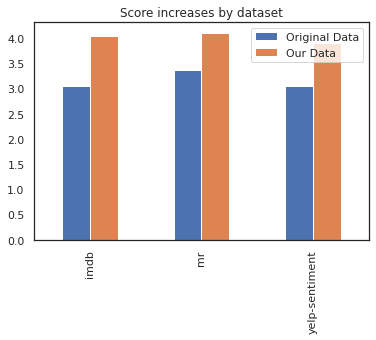

In [8]:
s4_by_dataset = s4_df.groupby('dataset')['label'].mean().to_frame().rename(columns={ 'label': 'Original Data' })
s5_by_dataset = s5_df.groupby('Input.dataset')['label'].mean().to_frame().rename(columns={ 'label': 'Our Data' })

ax = pd.concat((s4_by_dataset, s5_by_dataset), axis=1).plot(kind='bar')
ax.set_title('Score increases by dataset')

In [17]:
s5_df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.label_1',
       'Input.label_2', 'Input.text1', 'Input.text2', 'Input.score_1',
       'Input.score_2', 'Input.SE_Thresh', 'Input.dataset', 'Input.SE_Model',
       'Answer.semantic-similarity.label', 'Approve', 'Reject', 'label'],
      dtype='object')

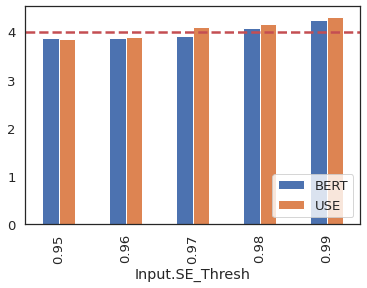

In [18]:
ax = s5_df.groupby(['Input.SE_Thresh', 'Input.SE_Model'])['label'].mean().unstack(level=-1).plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='lower right')
# add horizontal line at y=4
xs = np.linspace(-5, 5)
horiz_line_data = np.array([4 for i in range(len(xs))])
ax.plot(xs, horiz_line_data, 'r--') 

plt.savefig('use-thresh-bert-and-use', format='pdf')

In [11]:
def _c(t):
    """ converts RGB tuple to a color format matplotlib understands """
    if len(t) == 3: #add opacity
        t = t + (255.0,)
    return [tuple((x/255. for x in t),)]

In [12]:
# original: get_ticks returns = [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
use_thresh_graph_yticks = ['', '1 - Strongly Disagree', '2 - Disagree', '3 - Not Sure', '4 - Agree', '5 - Strongly Agree']

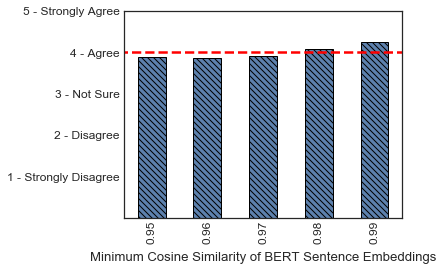

In [114]:
# fonts
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

# make graph
bert_df = s5_df[s5_df['Input.SE_Model'] == 'BERT']
ax = bert_df.groupby('Input.SE_Thresh')['label'].mean().plot(kind='bar', color=_c((75,115,164,230.)), 
                            edgecolor='black', linewidth=1.) 

#color=_c((75, 115, 165, 230.0)#
#sns.color_palette("cubehelix")
# ax = bert_df.groupby('Input.SE_Thresh')['label'].mean().plot(kind='bar'), palette="Blues_d")

# style graph
ax.set_ylim(0.0, 5.0) # This 
ax.set_yticklabels(use_thresh_graph_yticks)
# ax.set_title('Human responses across sentence encoding thresholds')
ax.set_xlabel('Minimum Cosine Similarity of BERT Sentence Embeddings')
ax.tick_params(axis='x', pad=2)
ax.tick_params(axis='y', pad=4)
ax.xaxis.labelpad = 8


# rotate x axis labels
# ax.set_xticklabels(ax.get_xticklabels()z, rotation=0, ha='right')

# add hatches
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']

# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i] * 3)
    thisbar.set_hatch('\\'*4)

# add horizontal line at y=4
xs = np.linspace(-5, 5)
horiz_line_data = np.array([4 for i in range(len(xs))])
# move numbers to above bars
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

# plot and save
ax.plot(xs, horiz_line_data, 'r--', color='red') 
plt.savefig('bert-thresh-final.pdf', format='pdf', bbox_inches="tight")
plt.tight_layout()

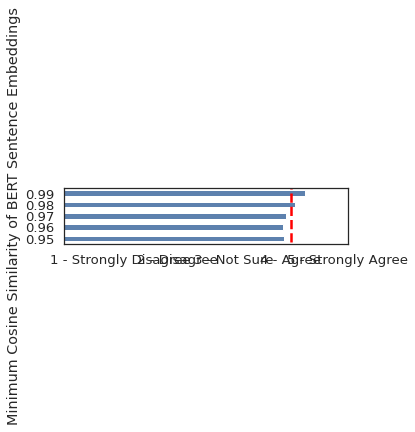

In [14]:
# try barh instead of bar
# i tink its worse
bert_df = s5_df[s5_df['Input.SE_Model'] == 'BERT']
ax = bert_df.groupby('Input.SE_Thresh')['label'].mean().plot(kind='barh', color=_c((75, 115, 165, 230.0)))
# style graph
ax.set_xlim(0.0, 5.0) # This 
ax.set_xticklabels(use_thresh_graph_yticks)
# ax.set_title('Human responses across sentence encoding thresholds')
ax.set_ylabel('Minimum Cosine Similarity of BERT Sentence Embeddings')
# add horizontal line at y=4
ys = np.linspace(-5, 5)
verti_line_data = np.array([4 for i in range(len(xs))])
# plot and save
ax.plot(verti_line_data, ys, 'r--', color='red') 
plt.tight_layout()
plt.savefig('bert-thresh-final-horizontal.pdf', format='pdf', bbox_inches="tight")

In [15]:
s5_df.shape

(9930, 40)

In [20]:
s4_df.groupby(['Input.run_type', 'Input.dataset'])['label'].mean()

Input.run_type  Input.dataset
alzantot        imdb             2.695
jin             imdb             3.414
                movie_review     3.370
                yelp_polarity    3.050
Name: label, dtype: float64

In [21]:
bert_df[s5_df['Input.SE_Thresh'] == 0.98].groupby('Input.dataset')['label'].mean()

/u/edl9cy/.conda/envs/text-attack/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Input.dataset
imdb              4.055102
mr                4.181250
yelp-sentiment    3.936842
Name: label, dtype: float64

In [22]:
bert_df[s5_df['Input.SE_Thresh'] == 0.98]['Input.dataset'].value_counts()

/u/edl9cy/.conda/envs/text-attack/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


imdb              490
mr                320
yelp-sentiment    190
Name: Input.dataset, dtype: int64

In [23]:
chosen_df = bert_df[s5_df['Input.SE_Thresh'] == 0.98]

/u/edl9cy/.conda/envs/text-attack/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [24]:
chosen_df.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Input.text2,Input.score_1,Input.score_2,Input.SE_Thresh,Input.dataset,Input.SE_Model,Answer.semantic-similarity.label,Approve,Reject,label
70,3EGKVCRQFWS23NN92F565L9F66DYBG,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,When I began watching The Muppets Take Manhatt...,0.921641,0.705677,0.98,imdb,BERT,Not sure,NaN,NaN,3
71,3EGKVCRQFWS23NN92F565L9F66DYBG,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,When I began watching The Muppets Take Manhatt...,0.921641,0.705677,0.98,imdb,BERT,Agree,NaN,NaN,4
72,3EGKVCRQFWS23NN92F565L9F66DYBG,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,When I began watching The Muppets Take Manhatt...,0.921641,0.705677,0.98,imdb,BERT,Strongly Agree,NaN,NaN,5
73,3EGKVCRQFWS23NN92F565L9F66DYBG,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,When I began watching The Muppets Take Manhatt...,0.921641,0.705677,0.98,imdb,BERT,Agree,NaN,NaN,4
74,3EGKVCRQFWS23NN92F565L9F66DYBG,3I7X2GF4HITNMQNSI4TO4GC73O3RHH,Does changing from text1 to text2 preserve mea...,Compare two short pieces of English text and d...,"meaning, semantic, similarity, text",$0.05,Sat Dec 07 14:31:39 PST 2019,10,BatchId:3862237;OriginalHitTemplateId:928390905;,180,...,When I began watching The Muppets Take Manhatt...,0.921641,0.705677,0.98,imdb,BERT,Agree,NaN,NaN,4


In [25]:
chosen_df.groupby('Input.text2')

In [26]:
chosen_df.groupby('Input.text2')['label'].agg(['min', 'max', 'std', 'count', 'nunique', lambda x: x.value_counts().index[0]])

,min,max,std,count,nunique,<lambda_0>
Input.text2,,,,,,
"""Home Room"" like ""Zero Day"" and ""Elephant"", was inspired by the recent wave of school shootings. But unlike the other two films, ""Home Room"" focuses on two survivors (not the shooters or those killed) in the aftermath of a shooting. Making it less exploitive and more useful because little effort is wasted in asking questions for which there are no answers. Don't give up on this little film during the first 20 minutes, it is supposed to set up the real story but plays like a rejected ""Hill Street Blues"" episode. It is lame but bear with it, at least it pads the running length enough to get the film classified as a feature. I recommended skipping this entirely and just jumping ahead to the hospital scenes-there is nothing here that you can't pick up from the remainder of the film. Like a lot of good little films this was creatively a one-man show as Paul F. Ryan was both the writer and the director. While this arrangement does not guarantee a good film, it is usually a good sign because it will mean a certain unity of construction and execution that is often lacking in big budget dramatic features. Because the script of ""Home Room"" is its real strength it is fortunate that the writer also executed the production and insured that his vision made it onto the screen. Ryan takes a huge chance with the ending which tests the limits of the average viewer's sentimentality tolerance. He runs it right up to the edge but against all logic leaves you crying instead of cringing. Why the ending works is some combination of the audience need for a reward at the end of this kind of journey, the song (Sarah McLaughlin's ""Sweet Surrender"") he goes out on, and the amazing editing of the final minute. The other strength of the film is the casting of Busy Phillips (Alicia) and Erika Christensen (Deanna) as the main protagonists. Although Phillips plays her standard alienated surly teen and Christensen her intelligent daughter of a good family, they both bring more intensity to their roles than ever before. The family life of both girls is more than satisfactory and of little interest to Ryan. What is happening here is all about the two of them despite a lame side story about a police detective wondering around town trying to tie Alicia to the lone shooter. If they ever re-cut and trim the film this side story should be condensed. A story about two extremely disparate girls bonding and helping each other is hardly a novel idea and Ryan could have easily steered this film into clich and predictability. But instead his script has them engaging in a fascinating and convincing sparring match, slowly chipping away at each other and sharing moments of vulnerability, only to retreat back inside themselves. Deanna's ""I'm dying inside"" line just tears you apart-I can't think of a moment in any other film that I felt as intensely as that one. She desperately needs a connection that Alicia just as desperately resists. Deanna only makes progress when she retreats. The viewer keeps expecting the group hug that never seems to happen. Ultimately this not only generates a lot of suspense but leaves you admiring both characters and the two actresses who brought them to life. Then again, what do I know? I'm only a child.",2,5,1.080123,10,3,5
. . . the photo's cleverness is paradoxically muted by the very people who are intended to make it shine .,3,5,0.823273,10,3,5
"...not that all Disney films are garbage. Anyway, I saw ""Legend of Boggy Creek"" first and absolutely loved the film. When I heard it had 2 sequels, I was ecstatic. I finally discovered a copy of this and watched it one night. I don't see how they can make a G-rated sequel to a horror films. The original is a film/documentary about the Fauke Monster, and can scare anyone. ""Returned"" is for children and should not be watched by anyone. I don't remember the plot too well, as it's been quite some time since I watched it and I will n

In [27]:
chosen_df.groupby('Input.text2')['label'].agg(lambda x: x.value_counts().iloc[0]).sort_values()

Input.text2
OK letting's got right to the point. We have five recent colleges grads (must have majored in the F word) going out on a weekends camping trip. They run into somebody who is in needed of helped, but instead of attempting to assists him, they deciding to set him on fire instead. Nice bunch of people. Next some of them start go get sick - must be something in the water at the cabin they are staying at. However the neighbors seem to be OK. Oh well, when things starting getting really bad, they lock up one their companions instead of getting helped (attempts the neighbors by the way). Some locals don't take a liking to them. They chasing one on a high speed romp through the woods for many miles, until the truck breaks down. Somehow ten minutes later he shows up at the cabin (how he could find it and how he could journey at the speed of light to get there is a mystery). Another of the brain surgeon types at the cabin realizes something is amiss so he hides out in a cave to let t

In [28]:
agreed_dist = chosen_df.groupby('Input.text2')['label'].agg(lambda x: x.value_counts().iloc[0]).sort_values()

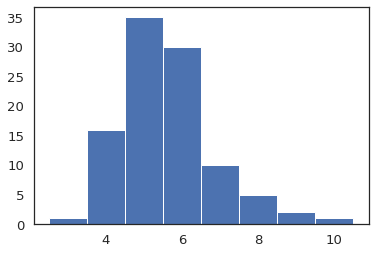

In [29]:
d = np.diff(np.unique(agreed_dist)).min()
left_of_first_bin = agreed_dist.min() - float(d)/2
right_of_last_bin = agreed_dist.max() + float(d)/2
plt.hist(agreed_dist, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

In [31]:
all_agreed_dist = bert_df.groupby(['Input.text2','Input.SE_Thresh'])['label'].agg(lambda x: x.value_counts().iloc[0]).sort_values()

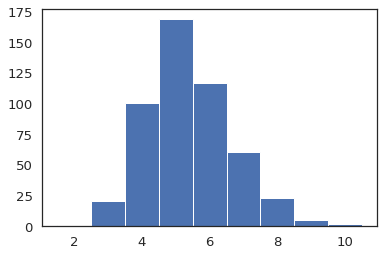

In [32]:
d = np.diff(np.unique(all_agreed_dist)).min()
left_of_first_bin = all_agreed_dist.min() - float(d)/2
right_of_last_bin = all_agreed_dist.max() + float(d)/2
plt.hist(all_agreed_dist, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

In [33]:
all_agreed_dist.mean()

5.384

In [34]:
agreed_dist.mean()

5.6

In [36]:
s4_agreed_dist = s4_df.groupby('Input.text2')['label'].agg(lambda x: x.value_counts().iloc[0]).sort_values()

In [37]:
s4_agreed_dist.mean()

5.0875